<a href="https://colab.research.google.com/github/riyadbinislam/Data_Visualization_with_Python__mh/blob/main/audi_used_car_analysis/audi_used_car_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries and Packages

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

Load Data

In [53]:
df = pd.read_csv("audi.csv")
#display(df.head())
#display(df.tail())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


Pie chart - Model

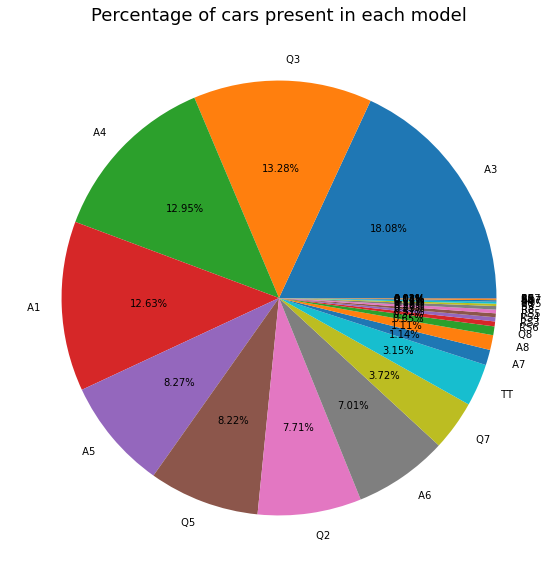

In [54]:
df['model'].value_counts().plot(kind="pie",
                                autopct='%1.2f%%',
                                textprops = {'fontsize':10})
plt.title("Percentage of cars present in each model")
plt.ylabel("")
plt.show()

Bar Plot - Model

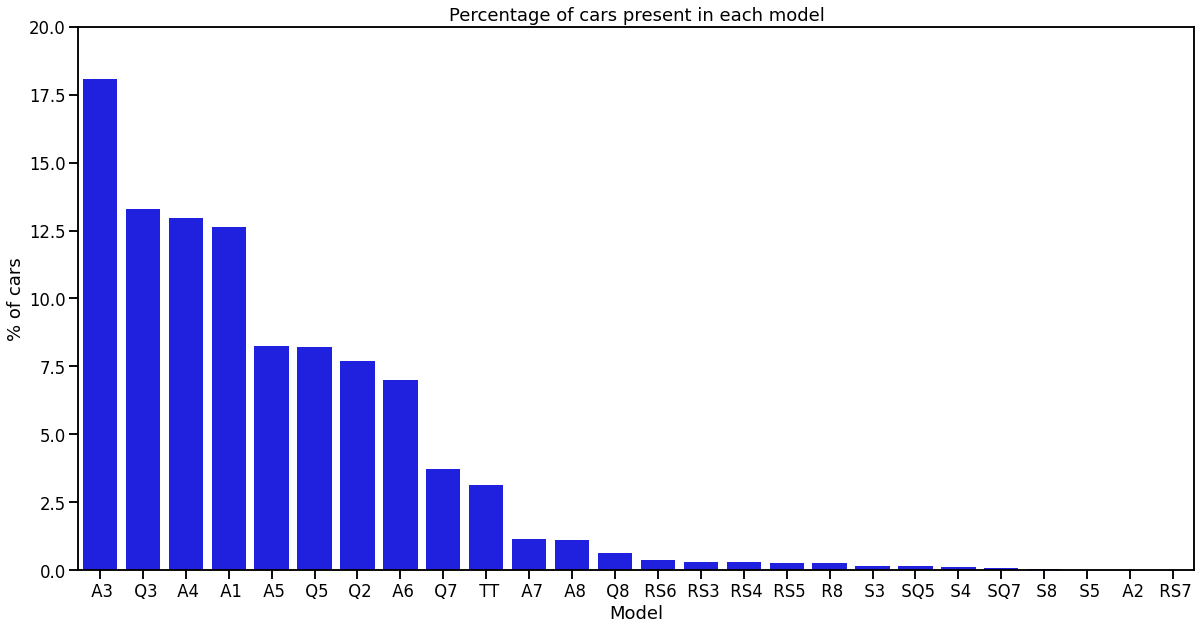

In [55]:
df_model = pd.DataFrame(df["model"].value_counts())
df_model = df_model.reset_index()
df_model = df_model.rename(columns={"index":"model",
                                    "model":"no_of_cars"})
df_model["% of cars"] = (df_model["no_of_cars"]/df.shape[0])*100
sns.barplot(x="model",
            y="% of cars",
            data=df_model,
            color="blue")
plt.yticks(np.arange(0,21,2.5))
plt.xlabel("Model")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each model")
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

**Comparison between pie chart and barplot**

In this case, the **barplot** is **better than** the **piechart**. Because,

1.   the pie chart is not suitable for these many models unlike the barplot
2.   it is almost impossible to identify the percentage of most car models and labels from the pie chart whereas the features are distinguishable from the barplot

**Scatterplot**

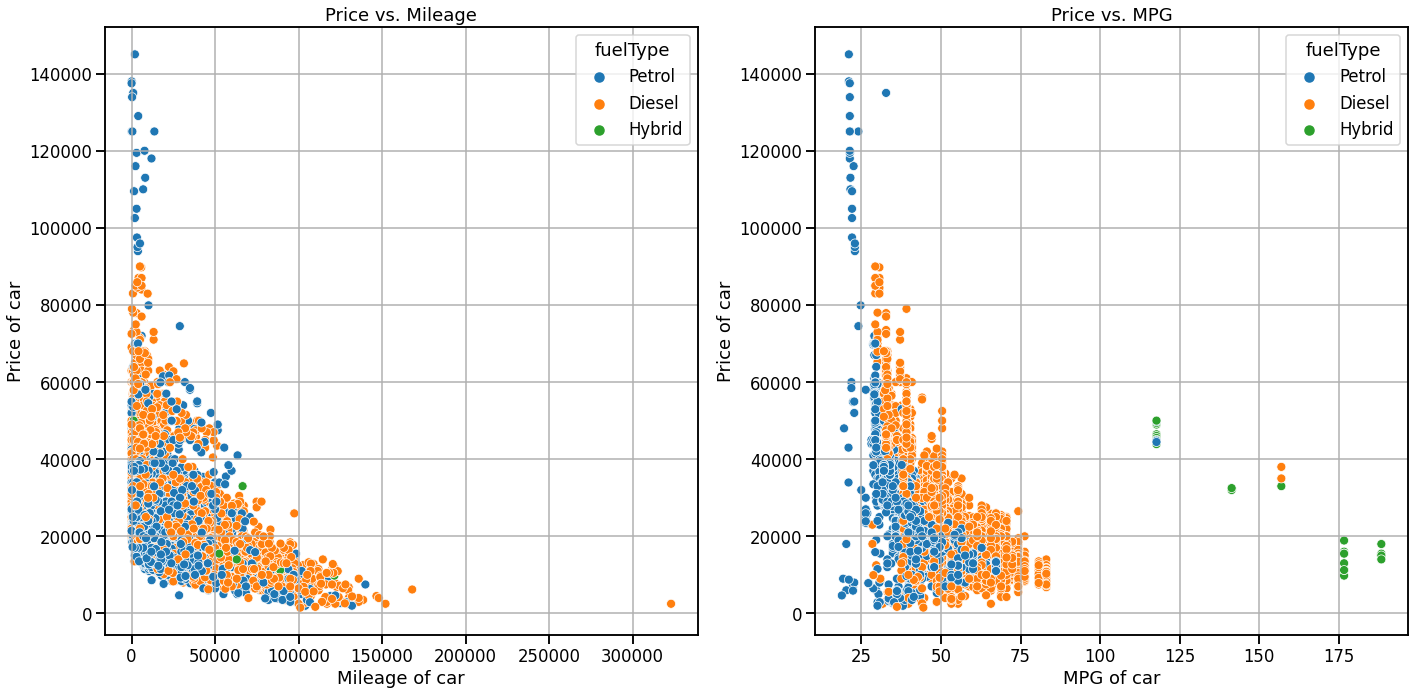

In [56]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(x="mileage", y="price", data=df, hue="fuelType")
plt.grid()
plt.xlabel("Mileage of car")
plt.ylabel("Price of car")
plt.title("Price vs. Mileage")

plt.subplot(1,2,2)
sns.scatterplot(x="mpg", y="price", data=df, hue="fuelType")
plt.grid()
plt.xlabel("MPG of car")
plt.ylabel("Price of car")
plt.title("Price vs. MPG")


plt.tight_layout()
plt.show()

**Explanation**

The above figure shows the correlation between price and mileage as well as price with mpg categorized by fuel type.

**Plot 1:** shows negative correlation between price and mileage. Which means the more the mileage(number of miles traveled) the lower the price. To inspect from the next code section, it can be seen that cars that have over 100000 miles of mileage, are several years older(most recent car is a 2017 model) which implies a more used car.

**Plot 2:** shows negative correlation between mpg(miles that can be travelled per gallon of fuel) and price. As inspected in the next code section, cars with less than 40 mpg are the most recent model by the year and has bigger engine size which indicates high fuel consumption for luxury services. Also, the mileage is lower which means a less used car. This depicts from the plot that with cars with lower mpg tends to have higher price because the cars provide luxury services which consume more fuel and travel less per gallon.


**Inspection**

In [57]:
# Plot 1 inspection
print(list(df[df.mileage>100000].year))
print(df[df.mileage>100000].year.max())

# Plot 2 inspection
print(df.loc[(df.mpg<40) & (df.price>80000)])

[2009, 2014, 2016, 2010, 2007, 2009, 2011, 2009, 2007, 2011, 2003, 2005, 2008, 2011, 2013, 2008, 2015, 2013, 2014, 2015, 2012, 2016, 2014, 2015, 2011, 2013, 2014, 2015, 2015, 2015, 2015, 2015, 2016, 2015, 2014, 2015, 2016, 2016, 2015, 2016, 2016, 2015, 2015, 2014, 2015, 2014, 2014, 2015, 2016, 2004, 2014, 2013, 2015, 2016, 2012, 2015, 2016, 2017, 2015, 2012, 2016, 2015, 2014, 2013, 2015, 2015, 2015, 2015, 2003, 2007, 2005, 2007, 2010, 2006, 2011, 2008, 2008, 2009, 2011, 2008, 2007, 2008, 2007, 2010, 2007, 2010, 2004, 2008, 2005, 2011, 2015, 2013, 2016, 2015, 2015, 2016, 2012, 2002, 2003, 2008, 2011, 2015, 2009, 2006, 2011, 2009, 2010, 2007, 1997, 2005, 2006, 2004, 2011, 2003, 2009]
2017
      model  year   price transmission  mileage fuelType   mpg  engineSize
316      Q7  2020   82995    Semi-Auto      826   Diesel  29.4         4.0
696      Q8  2019   83995    Semi-Auto     5978   Diesel  30.7         4.0
1107     Q8  2020   84496    Automatic     3522   Diesel  30.7         4.0
1646

**Regression Plot**

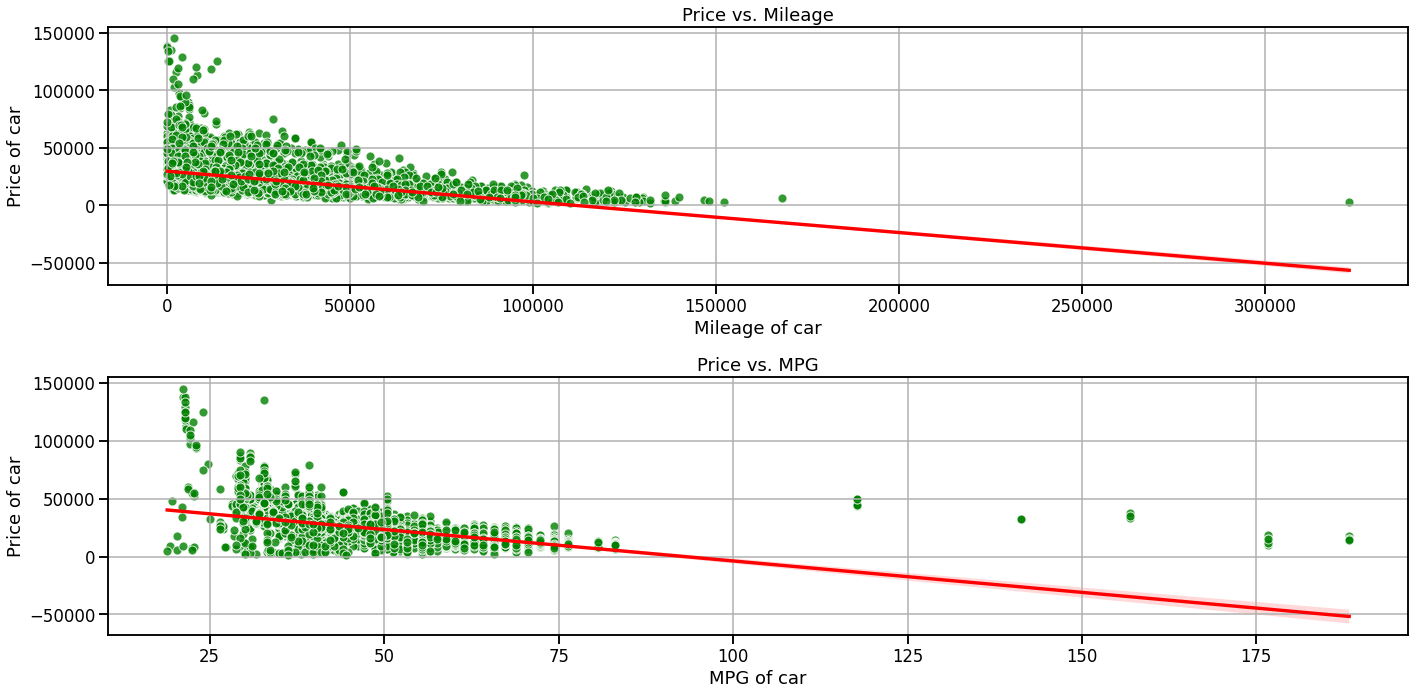

In [58]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
sns.regplot(x="mileage", y="price", data=df, scatter_kws={"color": "green", "edgecolor":"white"}, line_kws={"color":"red"})
plt.grid()
plt.xlabel("Mileage of car")
plt.ylabel("Price of car")
plt.title("Price vs. Mileage")

plt.subplot(2,1,2)
sns.regplot(x="mpg", y="price", data=df, scatter_kws={"color": "green", "edgecolor":"white"}, line_kws={"color":"red"})
plt.grid()
plt.xlabel("MPG of car")
plt.ylabel("Price of car")
plt.title("Price vs. MPG")

plt.tight_layout()
plt.show()

**Explanation**

As discussed in the earlier section, both the regression plot presents a negative correlation of price and mileage, also, price with mpg.

**Pair Plot**

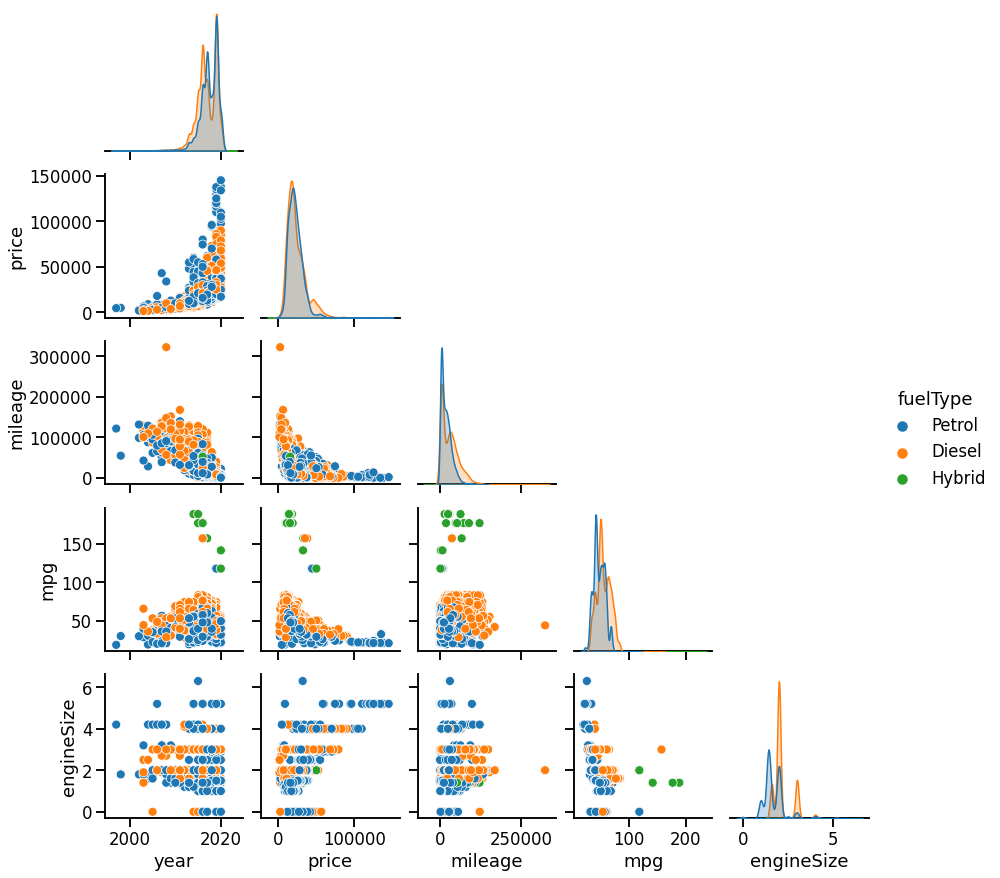

In [59]:
sns.pairplot(pd.read_csv("audi.csv"), corner=True, hue="fuelType")
plt.show()

**Explanation**

The pairplot is used to find a suitable set of features to explain a relationship between features. From the plot, relationship between price and mileage can be declared as the most suitable relationship for the given dataset.

**Finding Columns with numerical values**

In [60]:
num_cols = []

for col in df.columns:
    if df[col].dtypes != "O":
        num_cols.append(col)
print(num_cols)

#### one liner
#print(list(filter(None,[[0,col][df[col].dtypes!="O"] for col in df.columns])))

['year', 'price', 'mileage', 'mpg', 'engineSize']


**Boxplot**

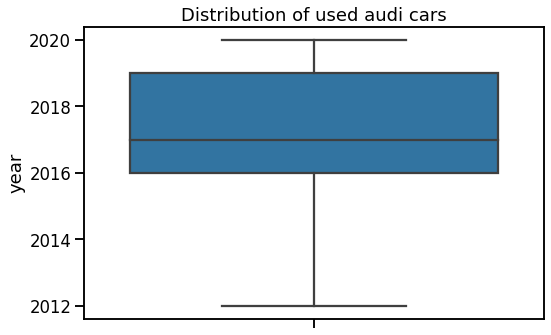

In [61]:
plt.figure(figsize=(8,5))
sns.boxplot(y="year", data=df, showfliers=False)
plt.title("Distribution of used audi cars")
plt.tight_layout()
plt.show()

**Explanation**

From the boxplot, the median is at year 2017 which means at this level, there are as much car as above 2017 and below 2017 year. At year 2020, the less used cars are found. The third quartile is at year 2019 which means 75% cars are older and from years below 2019. 50% of the used cars are from year 2016 to 2019.

**Violinplot**

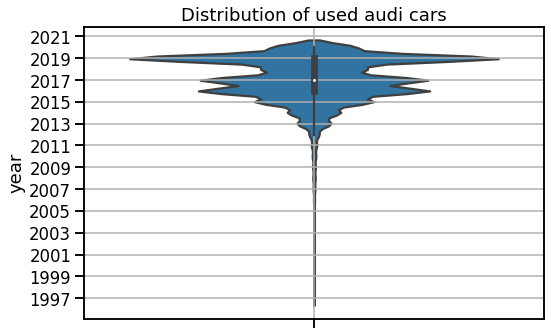

In [62]:
plt.figure(figsize=(8,5))
sns.violinplot(y="year", data=df, showfliers=False)
plt.title("Distribution of used audi cars")
plt.yticks(np.arange(df["year"].min(), df["year"].max()+2, 2))
plt.grid()
plt.tight_layout()
plt.show()

**Explanation**

The violinplot shows a perceivable display of the density of used cars as it shows which year has the most cars. Which can also be seen from the inspection section. The highest number of used cars are from the year 2019 and the lowest number of cars are from 1997. The median is at 2017 which means 50% cars are above 2017 and 50% are below 2017.

**Inspection**

In [63]:
print(df['year'].value_counts()) # Distribution of cars by year

print("Most cars available from the year: {}".format(df['year'].value_counts().idxmax())) # Most cars from a year


2019    3197
2016    1964
2017    1935
2015     999
2018     864
2020     716
2014     447
2013     291
2012      85
2011      47
2010      32
2009      23
2008      21
2007      16
2006       9
2005       7
2003       6
2004       5
2002       2
1998       1
1997       1
Name: year, dtype: int64
Most cars available from the year: 2019


**Histogram**

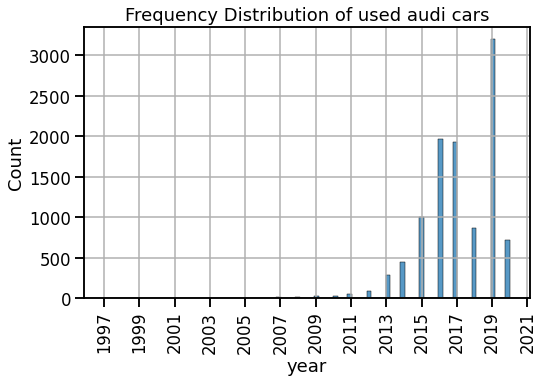

In [64]:
plt.figure(figsize=(8,5))
sns.histplot(x="year", data=df)
plt.title("Frequency Distribution of used audi cars")
plt.xticks(np.arange(df["year"].min(), df["year"].max()+2, 2), rotation=90)
plt.grid()
plt.show()

**Explanation**

The histogram plot shows the precise number of used car counts by year. More than 1500 cars are from 2016, 2017 and 2019.

**Comparison**

From all three plots above, it can be decided that histogram shows better and easily perceivable one as it distinctly reveals the distribution and populated area unlike boxplot and violinplot. Although the purpose of using boxplot, violinplot and histogram are different, in this case violinplot and histogram are more preferable as violinplot shows the density and histogram shows the count(frequency) of used cars.

** violinplot is better than boxplot because the density is more understandable from violinplot than a boxplot.